In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pickle

import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from utils import geodetic_to_enu

### Plotting Configuration Parameters

In [69]:
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend', fontsize=8)

width = 4
height = width/1.618

### Load data

In [70]:
takeoff_model = pickle.load(open('pretrained_models/takeoffs-20-pretrained.pkl', 'rb'))
landing_model = pickle.load(open('pretrained_models/landings-20-pretrained.pkl', 'rb'))

In [71]:
takeoff_model.keys()

dict_keys(['means', 'covs', 'cluster_probs'])

### Runway Configuration

In [72]:
airport_lat, airport_lon, airport_altitude = 40.642591, -73.776100, 12.
runways = [
    [[40.622320, -73.785180], [40.649969, -73.763803]],
    [[40.624484, -73.770972], [40.644714, -73.755179]],
    [[40.628179, -73.772435], [40.648180, -73.816414]],
    [[40.645449, -73.763416], [40.657636, -73.790474]]
]
M_TO_NM = 0.000539957
M_TO_FT = 3.28084

In [73]:
for r in runways:
    a,b=r[0],r[1]
    start_x, start_y, _ = geodetic_to_enu(a[0], a[1], airport_altitude, airport_lat, airport_lon, airport_altitude)
    end_x, end_y, _ = geodetic_to_enu(b[0], b[1], airport_altitude, airport_lat, airport_lon, airport_altitude)

In [74]:
def plot_runways_nm(ax):
    for r in runways:
        a,b=r[0],r[1]
        start_x, start_y, _ = geodetic_to_enu(a[0], a[1], airport_altitude, airport_lat, airport_lon, airport_altitude)
        end_x, end_y, _ = geodetic_to_enu(b[0], b[1], airport_altitude, airport_lat, airport_lon, airport_altitude)
        ax.plot([start_x*M_TO_NM, end_x*M_TO_NM], [start_y*M_TO_NM, end_y*M_TO_NM], '--', c='black', lw=1)
    ax.scatter(0, 0, s=4, c='black', marker='*')

## Make Plots

### Principal Deviations (takeoffs)

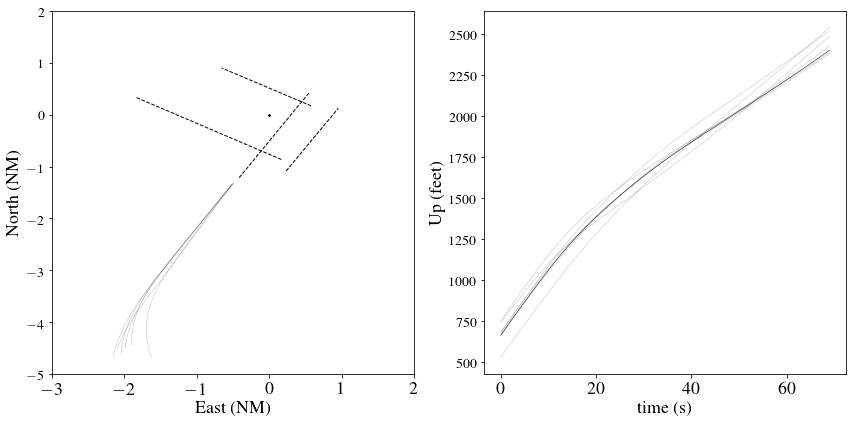

In [75]:
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=18)
plt.rc('legend', fontsize=14)

fig, (ax1, ax2) = plt.subplots(ncols=2)

j = np.argmax(takeoff_model['cluster_probs'])
cov = takeoff_model['covs'][j]
mean = takeoff_model['means'][j]
u,s,vt = np.linalg.svd(cov)
ax1.plot(mean[::3], mean[1::3], c='black', alpha=1., linewidth=.5)
ax1.set_xlim(-3, 2)
ax1.set_ylim(-5, 2)
ax1.set_xlabel('East (NM)')
ax1.set_ylabel('North (NM)')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Up (feet)')

plot_runways_nm(ax1)
ax2.plot(mean[2::3]/10*M_TO_FT, c='black', alpha=1., linewidth=.5)
for i in range(6):
    t = mean + vt[i,:]*np.sqrt(s[i])
    ax1.plot(t[::3]*M_TO_NM, t[1::3]*M_TO_NM, alpha=.25, c='black', linewidth=.5)
    ax2.plot(t[2::3]/10*M_TO_FT, alpha=.25, c='black', linewidth=.5)
fig.set_size_inches(12, 6)
plt.tight_layout()
plt.show()
plt.close()

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend', fontsize=8)

### Principal Deviations (landings)

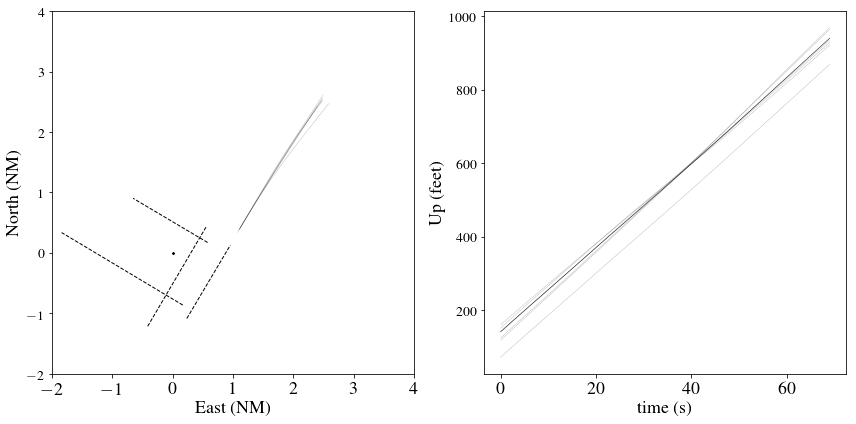

In [76]:
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=18)
plt.rc('legend', fontsize=14)

fig, (ax1, ax2) = plt.subplots(ncols=2)

j = np.argmax(landing_model['cluster_probs'])
cov = landing_model['covs'][j]
mean = landing_model['means'][j]
u,s,vt = np.linalg.svd(cov)
ax1.plot(mean[::3], mean[1::3], c='black', alpha=1., linewidth=.5)
ax1.set_xlim(-2, 4)
ax1.set_ylim(-2, 4)
ax1.set_xlabel('East (NM)')
ax1.set_ylabel('North (NM)')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Up (feet)')

plot_runways_nm(ax1)
ax2.plot(mean[2::3]/10*M_TO_FT, c='black', alpha=1., linewidth=.5)
for i in range(6):
    t = mean + vt[i,:]*np.sqrt(s[i])
    ax1.plot(t[::3]*M_TO_NM, t[1::3]*M_TO_NM, alpha=.25, c='black', linewidth=.5)
    ax2.plot(t[2::3]/10*M_TO_FT, alpha=.25, c='black', linewidth=.5)
fig.set_size_inches(12, 6)
plt.tight_layout()
plt.show()
plt.close()

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend', fontsize=8)

### Samples from most probable cluster (takeoffs)

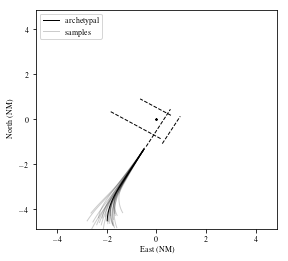

In [81]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

j = np.argmax(takeoff_model['cluster_probs'])
cov = takeoff_model['covs'][j]
mean = takeoff_model['means'][j]
u,s,vt = np.linalg.svd(cov)
cov = np.dot(u[:,:5], np.dot(np.diag(s[:5]), vt[:5,:]))

ax.set_xlim(-9000*M_TO_NM, 9000*M_TO_NM)
ax.set_ylim(-9000*M_TO_NM, 9000*M_TO_NM)
ax.set_xlabel('East (NM)')
ax.set_ylabel('North (NM)')
plot_runways_nm(ax)

samps = np.random.multivariate_normal(mean,cov,size=25)
samp = samps[0].reshape(samps[0].shape[0] // 3, 3)
ax.plot(mean[::3]*M_TO_NM, mean[1::3]*M_TO_NM, c='black', lw=1, label='archetypal')
ax.plot(samp[:, 0]*M_TO_NM, samp[:, 1]*M_TO_NM, c='black', alpha=.2, lw=1, label='samples')
for samp in samps[1:]:
    samp = samp.reshape(samp.shape[0] // 3, 3)
    ax.plot(samp[:, 0]*M_TO_NM, samp[:, 1]*M_TO_NM, c='black', alpha=.2, lw=1)
ax.legend(loc='upper left')
fig.set_size_inches(4, 3.75)
plt.show()
plt.close()

### Samples from most probable cluster (landings)

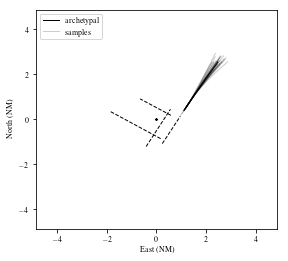

In [82]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

j = np.argmax(landing_model['cluster_probs'])
cov = landing_model['covs'][j]
mean = landing_model['means'][j]
u,s,vt = np.linalg.svd(cov)
cov = np.dot(u[:,:5], np.dot(np.diag(s[:5]), vt[:5,:]))

ax.set_xlim(-9000*M_TO_NM, 9000*M_TO_NM)
ax.set_ylim(-9000*M_TO_NM, 9000*M_TO_NM)
ax.set_xlabel('East (NM)')
ax.set_ylabel('North (NM)')
plot_runways_nm(ax)

samps = np.random.multivariate_normal(mean,cov,size=25)
samp = samps[0].reshape(samps[0].shape[0] // 3, 3)
ax.plot(mean[::3]*M_TO_NM, mean[1::3]*M_TO_NM, c='black', lw=1, label='archetypal')
ax.plot(samp[:, 0]*M_TO_NM, samp[:, 1]*M_TO_NM, c='black', alpha=.2, lw=1, label='samples')
for samp in samps[1:]:
    samp = samp.reshape(samp.shape[0] // 3, 3)
    ax.plot(samp[:, 0]*M_TO_NM, samp[:, 1]*M_TO_NM, c='black', alpha=.2, lw=1)
ax.legend(loc='upper left')
fig.set_size_inches(4, 3.75)
plt.show()
plt.close()

### Archetypal trajectories (takeoffs)

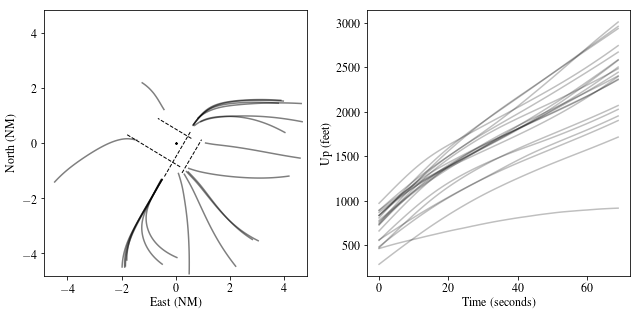

In [83]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=12)

means = takeoff_model['means']

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2)
fig.subplots_adjust(left=.1, bottom=.1, right=1, top=1)
ax1.set_xlim(-9000*M_TO_NM,9000*M_TO_NM)
ax1.set_ylim(-9000*M_TO_NM,9000*M_TO_NM)
ax1.set_xlabel('East (NM)')
ax1.set_ylabel('North (NM)')
plot_runways_nm(ax1)
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Up (feet)')
for mean in means:
    mean = mean.reshape(mean.shape[0] // 3, 3)
    ax1.plot(mean[:, 0]*M_TO_NM, mean[:, 1]*M_TO_NM, c='black', alpha=.5)
    ax2.plot(mean[:, -1]/10.*M_TO_FT, c='black', alpha=.25)
fig.set_size_inches(9., 4.5)
plt.tight_layout()
plt.show()
plt.close()

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend', fontsize=8)

### Archetypal trajectories (landings)

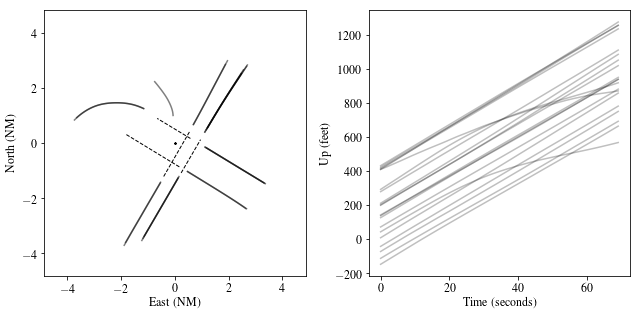

In [84]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=12)

means = landing_model['means']

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2)
fig.subplots_adjust(left=.1, bottom=.1, right=1, top=1)
ax1.set_xlim(-9000*M_TO_NM,9000*M_TO_NM)
ax1.set_ylim(-9000*M_TO_NM,9000*M_TO_NM)
ax1.set_xlabel('East (NM)')
ax1.set_ylabel('North (NM)')
plot_runways_nm(ax1)
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Up (feet)')
for mean in means:
    mean = mean.reshape(mean.shape[0] // 3, 3)
    ax1.plot(mean[:, 0]*M_TO_NM, mean[:, 1]*M_TO_NM, c='black', alpha=.5)
    ax2.plot(mean[:, -1]/10.*M_TO_FT, c='black', alpha=.25)
fig.set_size_inches(9., 4.5)
plt.tight_layout()
plt.show()
plt.close()

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend', fontsize=8)

### Histogram of samples

In [85]:
from utils import generate

In [86]:
def generate_data(means, covs, cluster_probs, size=100):
    covs_r = []
    for cov in covs:
        u,s,vt = np.linalg.svd(cov)
        cov_new = (u[:,:5], s[:5], vt[:5,:])
        covs_r.append(cov_new)

    k = len(cluster_probs)
    samps = np.zeros((size,means[0].shape[0]))
    for i in range(size):
        j = np.random.choice(np.arange(k),p=cluster_probs)
        samps[i, :] = generate(means[j], covs_r[j])

    return samps

#### Takeoffs

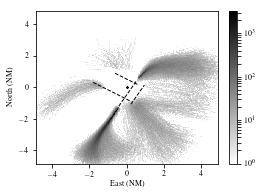

In [87]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=.2, bottom=.16, right=.99, top=.97)

samps = generate_data(takeoff_model['means'], takeoff_model['covs'], takeoff_model['cluster_probs'], 10000)

plt.hist2d(samps[:, ::3].flatten()*M_TO_NM, samps[:, 1::3].flatten()*M_TO_NM, bins=300, norm = LogNorm(),
          cmap='gray_r', range=[[-9000*M_TO_NM, 9000*M_TO_NM], [-9000*M_TO_NM, 9000*M_TO_NM]])
plt.colorbar()
ax.set_xlim(-9000*M_TO_NM,9000*M_TO_NM)
ax.set_ylim(-9000*M_TO_NM,9000*M_TO_NM)
ax.set_xlabel('East (NM)')
ax.set_ylabel('North (NM)')
plot_runways_nm(ax)
fig.set_size_inches(width, height+.15)
plt.show()
plt.close()

#### Landings

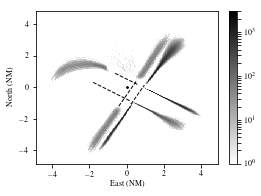

In [88]:
fig, ax = plt.subplots()
fig.subplots_adjust(left=.2, bottom=.16, right=.99, top=.97)

samps = generate_data(landing_model['means'], landing_model['covs'], landing_model['cluster_probs'], 10000)

plt.hist2d(samps[:, ::3].flatten()*M_TO_NM, samps[:, 1::3].flatten()*M_TO_NM, bins=300, norm = LogNorm(),
          cmap='gray_r', range=[[-9000*M_TO_NM, 9000*M_TO_NM], [-9000*M_TO_NM, 9000*M_TO_NM]])
plt.colorbar()
ax.set_xlim(-9000*M_TO_NM,9000*M_TO_NM)
ax.set_ylim(-9000*M_TO_NM,9000*M_TO_NM)
ax.set_xlabel('East (NM)')
ax.set_ylabel('North (NM)')
plot_runways_nm(ax)
fig.set_size_inches(width, height+.15)
plt.show()
plt.close()